In [ ]:
%matplotlib inline

## Array computing

- Will focus on `numpy`
- Simple motivation
   - Short
   - Powerful syntax
   - Also efficient
- More later


## Numpy arrays

- Fixed **size**
- Contiguous block of memory
- Fixed datatype (typically), **dtype**
- Can change the **shape**
- Structured arrays: packed structs
- Arbitrary number of dimensions
- Indexing, slicing and striding
- Memory efficient: views vs copies
- Assume familiarity: https://numpy.org/doc/stable/user/quickstart.html


## Some simple examples


In [1]:
import numpy as np


All three versions do different things:

1. B = A

This binds a new name B to the existing object already named A. Afterwards they refer to the same object, so if you modify one in place, you'll see the change through the other one too.

2. B[:] = A (same as B[:]=A[:]?)

This copies the values from A into an existing array B. The two arrays must have the same shape for this to work. B[:] = A[:] does the same thing (but B = A[:] would do something more like 1).

3. B = numpy.copy(A)

This is almost the same as 2, but it creates a new array, rather than reusing the B array. If there were no other references to the previous B value, the end result would be the same as 2, but it will use more memory temporarily during the copy.

In [2]:
x = [1, 2, ]
x[:3]

[1, 2]

In [4]:
x = np.arange(10.0)
print(x.size, x.itemsize)
print('shape:', x.shape)
print('dtype:', x.dtype)
print(x.nbytes)

10 8
shape: (10,)
dtype: float64
80


In [5]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
x[1:3]

In [ ]:
x[1:-3]

In [ ]:
x[:-3]

In [11]:
x[1:-3:2]

array([], dtype=float64)

## Multi-dimensional arrays

- Many array creation functions
- `array, zeros, zeros_like, ones, ones_like, empty`,
- `empty_like, arange, linspace, fromfunction, fromfile`


In [ ]:
x = np.identity(5)
x

In [12]:
np.zeros((2, 2, 2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [ ]:
x, x.dtype

In [ ]:
x = np.arange(9)
x.strides

In [ ]:
x = np.arange(9)
x.shape = 3, 3
x

In [6]:
x.strides

(8,)

In [ ]:
x[0, 1]

In [ ]:
x[0][1]

In [ ]:
# Elementwise operations
2*x

In [7]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

## Simple Laplace equation in 2D

- Jacobi iterations
- Basic theory


## Simple implementation

- Using simple looping


In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
T = np.zeros((10, 10))
T[0] = 100
T[:,-1] = 100

In [16]:
Tn = np.empty_like(T)
Tn


array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]])

In [17]:
def loop(T):
    N = T.shape[0]
    Tn = np.empty_like(T)
    for i in range(1, N-1):
        for j in range(1, N-1):
            Tn[i, j] = (T[i+1, j] + T[i-1,j] + T[i, j+1] + T[i, j-1])*0.25
            
    T[1:-1, 1:-1] = Tn[1:-1, 1:-1]

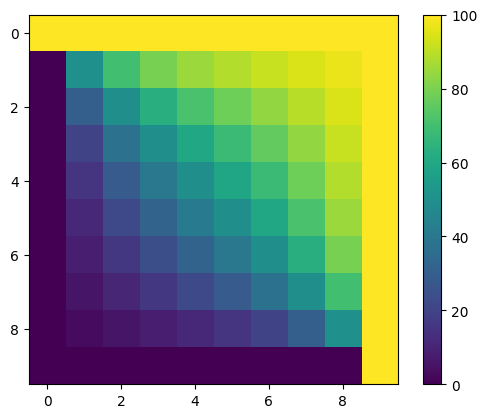

In [21]:
for i in range(1000): loop(T)
plt.imshow(T); plt.colorbar();

## Using numpy arrays

- Implementation
- How it works


In [ ]:
def array_loop(T):
    T[1:-1, 1:-1] = (T[2:, 1:-1] + T[:-2,1:-1] + T[1:-1,2:] + T[1:-1, :-2])*0.25

In [ ]:
T = np.zeros((10, 10))
T[0] = 100
T[:,-1] = 100

In [ ]:
for i in range(100): array_loop(T)
plt.imshow(T); plt.colorbar();

## Timing

- Simplistic timing for now
- Use the `time` module
- Or we can use `%timeit` or `%time`


In [ ]:
n = 50
T = np.zeros((n, n))

In [ ]:
M = 20
import time
s = time.perf_counter()
for i in range(M):
    array_loop(T)
print(time.perf_counter() - s)

In [ ]:
import timeit

In [ ]:
%timeit np.empty_like(T)

In [ ]:
%timeit T.copy()

In [22]:
timeit??

Source:
    @skip_doctest
    @no_var_expand
    @line_cell_magic
    @needs_local_scope
    def timeit(self, line='', cell=None, local_ns=None):
        """Time execution of a Python statement or expression

        Usage, in line mode:
          %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
        or in cell mode:
          %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
          code
          code...

        Time execution of a Python statement or expression using the timeit
        module.  This function can be used both as a line and cell magic:

        - In line mode you can time a single-line statement (though multiple
          ones can be chained with using semicolons).

        - In cell mode, the statement in the first line is used as setup code
          (executed but not timed) and the body of the cell is timed.  The cell
          body has access to any variables created in the setup code.

        Options:
        -n<N>: execute the given statement <N> t

In [ ]:
%timeit loop(T)

## How does this work?

- Advantages and pitfalls
- Why use arrays?
